In [1]:
#import basic libraries
import numpy as np
import pandas as pd
import seaborn as sns

# Import r2_score functions from scikit-learn library to evaluate regression models and MSE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# Import cross_val_score and train_test_split functions from scikit-learn library
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# Import the MinMaxScaler class from the scikit-learn library for scaling data
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Load data from CSV file 'merged_data1.csv' using 'utf8' encoding and ';' separator
df = pd.read_csv('merged_data1.csv',encoding = 'utf8',sep=';')
df.head() #Shows the first 5 rows of the data frame

,M_C,M_A,IS_SYM,P,T,Rho
0,62.061,73.071,0,0.1,298.15,1121.05
1,62.061,73.071,0,0.1,303.15,1116.04
2,62.061,73.071,0,0.1,313.15,1105.32
3,62.061,73.071,0,0.1,323.15,1092.97
4,62.061,73.071,0,0.1,333.15,1079.64


In [3]:
'''Select the columns 'M_C', 'M_A', 'IS_SYM', 'P', 'T' and store them as a NumPy matrix in the variable 'X' 
Where:
M_C : Molar mass of cation
M_A: Molar mass of anion
IS_SYM: Is the cation symmetrical (0,1)
P: Pressure (MPa)
T: Temperature (K)

'''
X = df[['M_C', 'M_A', 'IS_SYM', 'P', 'T']].values
#Select the 'Rho' column and store it as a NumPy matrix in the 'y' variable (Rho - density kg/m^3)
y = df[['Rho']].values

In [4]:
'''Data preparation - dividing data into training and test set'''

X_train, X_test, y_train, y_test = train_test_split(
X,y,test_size = 0.3, random_state = 42)

print(X_train.shape)
print(y_train.shape)
print('Test shapes')
print(X_test.shape)
print(y_test.shape)

(2230, 5)
(2230, 1)
Test shapes
(957, 5)
(957, 1)


In [5]:
'''Initialize the MinMaxScaler object and Fit scaling to training data 'X_train' 
and Scale training data 'X_train' and test data 'X_test' '''
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Main architecture of the network

In [6]:
# Import the Sequential class from the TensorFlow/Keras library to create sequential models
from tensorflow.keras.models import Sequential

# Import a Dense layer from the TensorFlow/Keras library to create dense layers.
from tensorflow.keras.layers import Dense

# Import a Dropout layer from the TensorFlow/Keras library to apply discard layers.
from keras.layers import Dense, Dropout

# Import l2 regularization from Keras library to L2 regularization
from keras.regularizers import l2

## NN Model

In [7]:
'''
The code creates a sequential deep neural network 
model with several densely connected layers. 
The model has different numbers of neurons in successive layers, 
different activation functions (tanh and GELU) and L2 regularization to control overfitting. 
The last layer with one neuron suggests that the model is used for a regression task.
'''

model = Sequential()
model.add(Dense(5, activation='tanh', kernel_regularizer=l2(0.1)))  # Model with strong L2 reg.
model.add(Dense(5, activation='tanh', kernel_regularizer=l2(0.1)))
model.add(Dense(55, activation='gelu', kernel_regularizer=l2(0.1)))
model.add(Dense(55, activation='gelu', kernel_regularizer=l2(0.1)))
model.add(Dense(25, activation='gelu', kernel_regularizer=l2(0.1)))
model.add(Dense(25, activation='gelu', kernel_regularizer=l2(0.1)))
model.add(Dense(25, activation='gelu', kernel_regularizer=l2(0.1)))
model.add(Dense(25, activation='gelu', kernel_regularizer=l2(0.1)))
model.add(Dense(25, activation='gelu', kernel_regularizer=l2(0.1)))
model.add(Dense(25, activation='gelu', kernel_regularizer=l2(0.1)))
model.add(Dense(1))


In [8]:
n = 1800

In [9]:
#Compile and train network on n epochs

model.compile(optimizer='adam', loss='mse', metrics=['mae', 'accuracy'])
history = model.fit(x=X_train, y=y_train, epochs=n, verbose=0)

In [10]:
# Predict values on the test set, train set and store the results in the variable 'y_test_m & y_train_m'

y_test_m=model.predict(X_test)
y_train_m= model.predict(X_train)

70/70 [==============================] - 0s 1ms/step


In [11]:

### Metrics for test set:
r2 = r2_score(y_test_m, y_test)
print(f"Determination coefficient R^2: {r2}")
mse = mean_squared_error(y_test_m, y_test)
print(f"Mean squared error MSE: {mse}")

Determination coefficient R^2: 0.9638998224665586
Mean squared error MSE: 711.1403410489393


In [12]:
### Metrics for train set:
r2_train = r2_score(y_train_m, y_train)
print(f"Determination coefficient R^2: {r2_train}")
mse_train = mean_squared_error(y_train, y_train)
print(f"Mean squared error MSE: {mse_train}")

Determination coefficient R^2: 0.962212797558648
Mean squared error MSE: 0.0


In [13]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
import keras
from scikeras.wrappers import KerasRegressor

from sklearn.model_selection import cross_val_score

In [14]:
def create_model():
    return model

keras_regressor = KerasRegressor(build_fn=create_model, epochs=n, batch_size= 64)  # Ustaw odpowiednie parametry

In [16]:
# Use cross-validation (cross_val_score) to evaluate the 'keras_regressor' model
# on the test set 'X_test' with five folds and evaluate the results using the R-squared ('r2') measure.

cv_scores = cross_val_score(keras_regressor, X_test, y_test, cv=5, scoring='r2')

Epoch 1/1800
12/12 [==============================] - 0s 3ms/step - loss: 723.6841 - mae: 14.3205 - accuracy: 0.0000e+00
Epoch 2/1800
12/12 [==============================] - 0s 4ms/step - loss: 655.9529 - mae: 13.0227 - accuracy: 0.0000e+00
Epoch 3/1800
 1/12 [=>............................] - ETA: 0s - loss: 769.5096 - mae: 14.0478 - accuracy: 0.0000e+00

E:\Anaconda\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


12/12 [==============================] - 0s 3ms/step - loss: 676.8134 - mae: 13.9317 - accuracy: 0.0000e+00
Epoch 4/1800
12/12 [==============================] - 0s 3ms/step - loss: 706.7836 - mae: 14.5051 - accuracy: 0.0000e+00
Epoch 5/1800
12/12 [==============================] - 0s 3ms/step - loss: 703.1614 - mae: 15.2571 - accuracy: 0.0000e+00
Epoch 6/1800
12/12 [==============================] - 0s 3ms/step - loss: 706.6880 - mae: 15.1456 - accuracy: 0.0000e+00
Epoch 7/1800
12/12 [==============================] - 0s 3ms/step - loss: 642.3723 - mae: 12.5025 - accuracy: 0.0000e+00
Epoch 8/1800
12/12 [==============================] - 0s 3ms/step - loss: 674.6664 - mae: 13.7377 - accuracy: 0.0000e+00
Epoch 9/1800
12/12 [==============================] - 0s 3ms/step - loss: 734.7150 - mae: 15.6978 - accuracy: 0.0000e+00
Epoch 10/1800
12/12 [==============================] - 0s 3ms/step - loss: 690.1110 - mae: 14.0727 - accuracy: 0.0000e+00
Epoch 11/1800
12/12 [=======================

E:\Anaconda\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 5/1800
12/12 [==============================] - 0s 3ms/step - loss: 237.5911 - mae: 8.8800 - accuracy: 0.0000e+00
Epoch 6/1800
12/12 [==============================] - 0s 3ms/step - loss: 217.3570 - mae: 8.1211 - accuracy: 0.0000e+00
Epoch 7/1800
12/12 [==============================] - 0s 3ms/step - loss: 227.1370 - mae: 8.6834 - accuracy: 0.0000e+00
Epoch 8/1800
12/12 [==============================] - 0s 3ms/step - loss: 235.0296 - mae: 8.6062 - accuracy: 0.0000e+00
Epoch 9/1800
12/12 [==============================] - 0s 3ms/step - loss: 220.4611 - mae: 8.2050 - accuracy: 0.0000e+00
Epoch 10/1800
12/12 [==============================] - 0s 3ms/step - loss: 219.7317 - mae: 8.0883 - accuracy: 0.0000e+00
Epoch 11/1800
12/12 [==============================] - 0s 3ms/step - loss: 244.6683 - mae: 9.7651 - accuracy: 0.0000e+00
Epoch 12/1800
12/12 [==============================] - 0s 3ms/step - loss: 237.2876 - mae: 8.9216 - accuracy: 0.0000e+00
Epoch 13/1800
12/12 [================

E:\Anaconda\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 5/1800
12/12 [==============================] - 0s 2ms/step - loss: 123.7905 - mae: 6.0909 - accuracy: 0.0000e+00
Epoch 6/1800
12/12 [==============================] - 0s 2ms/step - loss: 119.8501 - mae: 5.5094 - accuracy: 0.0000e+00
Epoch 7/1800
12/12 [==============================] - 0s 3ms/step - loss: 121.6621 - mae: 6.0084 - accuracy: 0.0000e+00
Epoch 8/1800
12/12 [==============================] - 0s 2ms/step - loss: 130.4916 - mae: 6.5421 - accuracy: 0.0000e+00
Epoch 9/1800
12/12 [==============================] - 0s 2ms/step - loss: 131.5969 - mae: 6.3985 - accuracy: 0.0000e+00
Epoch 10/1800
12/12 [==============================] - 0s 2ms/step - loss: 113.6237 - mae: 5.0902 - accuracy: 0.0000e+00
Epoch 11/1800
12/12 [==============================] - 0s 2ms/step - loss: 130.2365 - mae: 6.2504 - accuracy: 0.0000e+00
Epoch 12/1800
12/12 [==============================] - 0s 2ms/step - loss: 150.3008 - mae: 7.3793 - accuracy: 0.0000e+00
Epoch 13/1800
12/12 [================

E:\Anaconda\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 5/1800
12/12 [==============================] - 0s 3ms/step - loss: 102.9044 - mae: 5.4639 - accuracy: 0.0000e+00
Epoch 6/1800
12/12 [==============================] - 0s 2ms/step - loss: 116.1704 - mae: 6.1798 - accuracy: 0.0000e+00
Epoch 7/1800
12/12 [==============================] - 0s 2ms/step - loss: 140.1287 - mae: 7.9718 - accuracy: 0.0000e+00
Epoch 8/1800
12/12 [==============================] - 0s 2ms/step - loss: 115.6077 - mae: 6.4751 - accuracy: 0.0000e+00
Epoch 9/1800
12/12 [==============================] - 0s 2ms/step - loss: 123.7199 - mae: 6.7573 - accuracy: 0.0000e+00
Epoch 10/1800
12/12 [==============================] - 0s 3ms/step - loss: 113.5095 - mae: 6.1936 - accuracy: 0.0000e+00
Epoch 11/1800
12/12 [==============================] - 0s 3ms/step - loss: 98.1049 - mae: 5.2169 - accuracy: 0.0000e+00
Epoch 12/1800
12/12 [==============================] - 0s 3ms/step - loss: 90.8431 - mae: 4.4797 - accuracy: 0.0000e+00
Epoch 13/1800
12/12 [==================

E:\Anaconda\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


12/12 [==============================] - 0s 3ms/step - loss: 71.6215 - mae: 3.6476 - accuracy: 0.0000e+00
Epoch 5/1800
12/12 [==============================] - 0s 3ms/step - loss: 79.5358 - mae: 4.4377 - accuracy: 0.0000e+00
Epoch 6/1800
12/12 [==============================] - 0s 3ms/step - loss: 71.0272 - mae: 3.2268 - accuracy: 0.0000e+00
Epoch 7/1800
12/12 [==============================] - 0s 3ms/step - loss: 69.7169 - mae: 3.3942 - accuracy: 0.0000e+00
Epoch 8/1800
12/12 [==============================] - 0s 2ms/step - loss: 63.5229 - mae: 2.4115 - accuracy: 0.0000e+00
Epoch 9/1800
12/12 [==============================] - 0s 3ms/step - loss: 66.7652 - mae: 2.9996 - accuracy: 0.0000e+00
Epoch 10/1800
12/12 [==============================] - 0s 3ms/step - loss: 68.0581 - mae: 3.2079 - accuracy: 0.0000e+00
Epoch 11/1800
12/12 [==============================] - 0s 2ms/step - loss: 69.8233 - mae: 3.3191 - accuracy: 0.0000e+00
Epoch 12/1800
12/12 [==============================] - 0s 2

In [17]:
mean_r2 = cv_scores.mean()
print("Average R^2 after 5-k fold cross.val.:", mean_r2)

Average R^2 after 5-k fold cross.val.: 0.9961413209453308


In [18]:
cv_scores


array([0.99100592, 0.99489829, 0.99828828, 0.99836277, 0.99815134])

In [19]:
print(history.history.keys())

dict_keys(['loss', 'mae', 'accuracy'])


In [20]:
model.evaluate(X_test,y_test)

30/30 [==============================] - 0s 1ms/step - loss: 67.1937 - mae: 3.5021 - accuracy: 0.0000e+00


[67.1937026977539, 3.502117156982422, 0.0]

In [21]:
test_predictions = model.predict(X_test)

30/30 [==============================] - 0s 1ms/step


In [23]:
train_predictions = model.predict(X_train)

70/70 [==============================] - 0s 1ms/step


In [36]:
test_predictions

0      1318.977905
1      1264.258423
2      1495.144165
3      1189.844360
4      1062.455933
          ...     
952    1202.888794
953    1075.586304
954    1379.859253
955    1449.549683
956    1320.728516
Length: 957, dtype: float32

In [37]:
# Convert the 'test_predictions' and train_predictions array to a Pandas series object so that it has the correct shape
test_predictions = pd.Series(test_predictions)

In [34]:
train_predictions1 = pd.Series(train_predictions.reshape(2230,))

In [40]:
pred_df = pd.DataFrame(y_test,columns = ['Test TRUE Y'])

In [41]:
pred_df = pd.concat([pred_df,test_predictions],axis = 1)

In [42]:
pred_df.columns = ['Test true y', 'Pred']

In [43]:
train_df = pd.DataFrame(y_train,columns = ['Test TRUE Y'])

In [44]:
train_df = pd.concat([train_df,train_predictions1],axis = 1)

In [45]:
train_df.columns = ['Test true y', 'Pred']

<Axes: xlabel='Test true y', ylabel='Pred'>

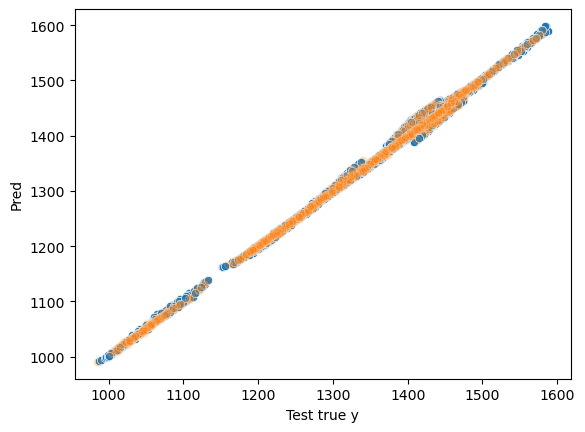

In [46]:
sns.scatterplot(x = 'Test true y', y = 'Pred', data = train_df)
sns.scatterplot(x = 'Test true y', y = 'Pred', data = pred_df, alpha = 0.2)

In [47]:
train_df.head()

,Test true y,Pred
0,1266.031562,1266.760620
1,1251.200000,1247.217407
2,1427.880000,1429.533936
3,1369.423066,1370.474121
4,1440.660000,1428.193481


In [48]:
pred_df.head()

,Test true y,Pred
0,1310.90,1318.977905
1,1266.10,1264.258423
2,1492.27,1495.144165
3,1190.69,1189.844360
4,1061.93,1062.455933


In [44]:
#Save full train and test set to CSV
train_df.to_csv('train_set_GESTOSC_GELU_ALPHA.csv', sep=';', encoding='utf-8')
pred_df.to_csv('test_set_GESTOSC_GELU_ALPHA.csv', sep=';', encoding='utf-8')

In [45]:
#Save model for future

model.save("Model_Rho_ALPHA_G1.h5")

E:\Anaconda\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Check network predictions for specific ionic liquids

In [62]:

def predictions3(MC, MA, SYM, P, T,vb=0):
    '''
    This function iterates over the pressure and temperature of the set ionic liquid.

    Parameters:
    MC (float): Mass of the cation.
    MA (float): Mass of the anion.
    SYM (int): Some constant value for IS_SYM.
    P (list): List of pressure values.
    T (list): List of temperature values.
    vb (int, optional): Verbosity level for model prediction. Defaults to 0.
    
    Returns:
    list: List of model predictions for all combinations of pressure and temperature.'''

    res = [model.predict(scaler.transform([[MC, MA, SYM, i, j]]), verbose=vb)[0] for i in P for j in T]
    return res

In [75]:
# '''TEST FOR SPECIFIC ILS '''
name = 'C3C1Pyr_NTF2'
Mcat = 113.121
Man = 280.146

P = [0.1,10,20,30,40,50,60,70,80,90,100]
T = [293.15,298.15,303.15,308.15,313.15,318.15]
result = predictions4(Mcat,Man,0,P,T);


In [64]:
res_flat = np.array(result).flatten()  # transformation to a one-dimensional numpy array
res_numerical = [val.item() for val in res_flat]  # extraction of numerical values

In [69]:
#This is just to check "In cito"
elements = [element for element in res_numerical]
print(elements)

[1441.1920166015625, 1437.5125732421875, 1433.7099609375, 1429.8167724609375, 1425.860107421875, 1421.856201171875, 1447.97412109375, 1444.4334716796875, 1440.7388916015625, 1436.9337158203125, 1433.0533447265625, 1429.1234130859375, 1454.4078369140625, 1451.037353515625, 1447.4747314453125, 1443.770751953125, 1439.9705810546875, 1436.109619140625, 1460.392333984375, 1457.2252197265625, 1453.82470703125, 1450.2445068359375, 1446.53564453125, 1442.7462158203125, 1465.9044189453125, 1462.9716796875, 1459.7657470703125, 1456.3375244140625, 1452.742431640625, 1449.0347900390625, 1470.927001953125, 1468.2550048828125, 1465.2744140625, 1462.030517578125, 1458.5777587890625, 1454.9727783203125, 1475.4547119140625, 1473.0611572265625, 1470.331298828125, 1467.302490234375, 1464.0235595703125, 1460.5494384765625, 1479.4923095703125, 1477.3851318359375, 1474.923828125, 1472.135986328125, 1469.0618896484375, 1465.7493896484375, 1483.0596923828125, 1481.23388671875, 1479.0489501953125, 1476.5186767

In [71]:
#This part has the task of converting 1D arrays into an array of dimension according to the experimental data
data_table = np.array(res_numerical).reshape(len(P), len(T))
pressure = pd.DataFrame(P, columns=['P'])
new_headers = {'P': 'P'}
new_cols = T
for i, temperature in enumerate(new_cols):
    new_headers[i] = temperature
data = pd.concat([pressure, pd.DataFrame(data_table)], axis=1)
data.rename(columns=new_headers, inplace=True)

In [72]:
#Check
data

,P,293.15,298.15,303.15,308.15,313.15,318.15
0,0.1,1441.192017,1437.512573,1433.709961,1429.816772,1425.860107,1421.856201
1,10.0,1447.974121,1444.433472,1440.738892,1436.933716,1433.053345,1429.123413
2,20.0,1454.407837,1451.037354,1447.474731,1443.770752,1439.970581,1436.109619
3,30.0,1460.392334,1457.225220,1453.824707,1450.244507,1446.535645,1442.746216
4,40.0,1465.904419,1462.971680,1459.765747,1456.337524,1452.742432,1449.034790
5,50.0,1470.927002,1468.255005,1465.274414,1462.030518,1458.577759,1454.972778
6,60.0,1475.454712,1473.061157,1470.331299,1467.302490,1464.023560,1460.549438
7,70.0,1479.492310,1477.385132,1474.923828,1472.135986,1469.061890,1465.749390
8,80.0,1483.059692,1481.233887,1479.048950,1476.518677,1473.674683,1470.556274
9,90.0,1486.186523,1484.627319,1482.713867,1480.450195,1477.853638,1474.953613


In [225]:
#Save dataframe to excel 
data.to_excel(name+'_PURE_R_DATA.xlsx', index=False)  

# NN Model ends here

# Upload model

In [77]:
from tensorflow.keras.models import load_model
model = load_model("Model_Rho_ALPHA_G1.h5") #Model name 

In [79]:
train_predictions = model.predict(X_train)

70/70 [==============================] - 0s 1ms/step


In [81]:
def predictions3(MC, MA, SYM, P, T,vb=0):
    '''
    This function iterates over the pressure and temperature of the set ionic liquid.

    Parameters:
    MC (float): Mass of the cation.
    MA (float): Mass of the anion.
    SYM (int): Some constant value for IS_SYM.
    P (list): List of pressure values.
    T (list): List of temperature values.
    vb (int, optional): Verbosity level for model prediction. Defaults to 0.
    
    Returns:
    list: List of model predictions for all combinations of pressure and temperature.'''

    res = [model.predict(scaler.transform([[MC, MA, SYM, i, j]]), verbose=vb)[0] for i in P for j in T]
    return res

In [82]:
name = 'C2ImC1OC6_NTF2'
Mcat = 211.181
Man = 280.146

P = [0.1019,9.81,19.62,29.43,39.24,49.05,58.86,68.67,78.48,88.29,98.1,107.91,117.72,127.53,137.34,147.15,156.96,166.77,176.58,186.39,196.2]
T = [293.75,312.85,333.15,352.95,373.25]
result = predictions3(Mcat,Man,0,P,T);

In [83]:
res_flat = np.array(result).flatten()  # transformation to a one-dimensional numpy array
res_numerical = [val.item() for val in res_flat]  # extraction of numerical values

In [84]:
#This part has the task of converting 1D arrays into an array of dimension according to the experimental data
data_table = np.array(res_numerical).reshape(len(P), len(T))
pressure = pd.DataFrame(P, columns=['P'])
new_headers = {'P': 'P'}
new_cols = T
for i, temperature in enumerate(new_cols):
    new_headers[i] = temperature
data = pd.concat([pressure, pd.DataFrame(data_table)], axis=1)
data.rename(columns=new_headers, inplace=True)

In [86]:
data

,P,293.75,312.85,333.15,352.95,373.25
0,0.1019,1356.983276,1340.418213,1322.390259,1304.200195,1284.906250
1,9.8100,1363.492920,1347.309692,1329.844116,1312.319824,1293.765137
2,19.6200,1369.873169,1354.011719,1337.040894,1320.128784,1302.281372
3,29.4300,1376.077271,1360.479736,1343.932739,1327.568726,1310.380737
4,39.2400,1382.122314,1366.739868,1350.550781,1334.670410,1318.087280
5,49.0500,1388.021729,1372.813354,1356.923340,1341.463013,1325.427734
6,58.8600,1393.784790,1378.719360,1363.076538,1347.976685,1332.429810
7,68.6700,1399.419312,1384.472534,1369.032227,1354.238159,1339.121460
8,78.4800,1404.928467,1390.084106,1374.810425,1360.272583,1345.529907
9,88.2900,1410.313721,1395.562744,1380.427124,1366.102539,1351.681152


In [42]:
 data.to_excel(name+'_PURE_R_DATA_AT.xlsx', index=False)  

# Special cases for testing numerical differentiation. Theory: the more steps, the better the derivatives should come out.

# Continuum


In [87]:
# Create a new list with increments of 1
new_P = list(range(int(P[0]), int(P[-1]) + 1))
new_P[0] = 0.1
# Count step
step = 1.0

# Tworzenie nowej listy z krokami co 1
new_T = [T[0]]
while new_T[-1] < T[-1]:
    new_T.append(new_T[-1] + step)

## P original, but T -> step 1K

In [88]:
len(P)*len(new_T)

1701

In [90]:
import time
start_time = time.time()
result =predictions3(Mcat,Man,0,P,new_T)
end_time = time.time()
exec_time = end_time - start_time
print(f"Time for execution: {exec_time} sec")

Time for execution: 81.3472511768341 sec


In [91]:
res_flat = np.array(result).flatten()  # przekształcenie do jednowymiarowej tablicy numpy
res_numerical = [val.item() for val in res_flat]  # wyodrębnienie wartości liczbowych
data_continuum = np.array(res_numerical).reshape(len(P), len(new_T))
cont = pd.DataFrame(data_continuum)
df = pd.DataFrame(P, columns=['P'])
data_continuum = pd.concat([df, cont], axis=1)

In [94]:
new_headers = {'P': 'P'}
new_columns = new_T
for i, temperatures in enumerate(new_columns):
    new_headers[i] = temperatures
data_continuum.rename(columns=nowe_naglowki, inplace=True)    

In [95]:
data_continuum

,P,0,1,2,3,4,5,6,7,8,...,71,72,73,74,75,76,77,78,79,80
0,0.1019,1356.983276,1356.121582,1355.259277,1354.396240,1353.533569,1352.669800,1351.805664,1350.940796,1350.075562,...,1293.058472,1292.104614,1291.149048,1290.192383,1289.234497,1288.274902,1287.313965,1286.351929,1285.388428,1284.423706
1,9.8100,1363.492920,1362.647095,1361.801392,1360.955688,1360.110107,1359.264648,1358.418823,1357.572754,1356.727051,...,1301.605469,1300.688110,1299.769531,1298.849609,1297.928223,1297.005371,1296.081299,1295.155762,1294.229004,1293.301147
2,19.6200,1369.873169,1369.040771,1368.209229,1367.377930,1366.546631,1365.715820,1364.885376,1364.055054,1363.225220,...,1309.819824,1308.937866,1308.054443,1307.170044,1306.284058,1305.396851,1304.508301,1303.618774,1302.727539,1301.835083
3,29.4300,1376.077271,1375.255859,1374.435303,1373.615479,1372.796265,1371.977417,1371.159424,1370.342041,1369.524658,...,1317.634766,1316.785522,1315.935303,1315.083984,1314.231445,1313.377686,1312.522827,1311.666992,1310.809814,1309.951294
4,39.2400,1382.122314,1381.309814,1380.498291,1379.687500,1378.877686,1378.068726,1377.260742,1376.453369,1375.647217,...,1325.076904,1324.258301,1323.438721,1322.618286,1321.796387,1320.973877,1320.150635,1319.325806,1318.500488,1317.673828
5,49.0500,1388.021729,1387.216187,1386.412109,1385.608765,1384.806885,1384.005737,1383.205933,1382.406860,1381.608643,...,1332.176025,1331.384888,1330.593018,1329.800537,1329.007202,1328.213135,1327.418213,1326.622803,1325.826172,1325.029175
6,58.8600,1393.784790,1392.985840,1392.187622,1391.390503,1390.594849,1389.800415,1389.007202,1388.214966,1387.423828,...,1338.960083,1338.193970,1337.427002,1336.659668,1335.891724,1335.123291,1334.354492,1333.584961,1332.815063,1332.044556
7,68.6700,1399.419312,1398.625000,1397.832275,1397.040527,1396.250366,1395.461426,1394.673706,1393.887451,1393.102295,...,1345.458130,1344.713501,1343.968872,1343.223755,1342.478271,1341.732910,1340.987183,1340.241211,1339.494751,1338.748047
8,78.4800,1404.928467,1404.138916,1403.350952,1402.564087,1401.778564,1400.994751,1400.212036,1399.430786,1398.650635,...,1351.696289,1350.970947,1350.245483,1349.519897,1348.794678,1348.069092,1347.343872,1346.618164,1345.892700,1345.167114
9,88.2900,1410.313721,1409.529053,1408.745361,1407.963745,1407.182739,1406.403564,1405.625488,1404.849121,1404.073853,...,1357.700073,1356.990967,1356.282471,1355.573608,1354.865356,1354.157471,1353.449829,1352.742310,1352.035034,1351.327881


In [30]:
data_continuum.to_excel(nazwa+'_ORIG_P_Step1T_R_DATA.xlsx', index=False)  

## p co 1 t co 1

In [96]:
len(new_P)*len(new_T)

15957

In [97]:
import time
start_time = time.time()
result_1_1 =predictions3(Mcat,Man,0,new_P,new_T)
end_time = time.time()
execut_time = end_time - start_time
print(f"Time {execut_time} sec")

Time 773.6454713344574 sec


In [98]:
res_flat_1_1 = np.array(result_1_1).flatten()  
res_numerical_1_1 = [val.item() for val in res_flat_1_1]  # wyodrębnienie wartości liczbowych
continuum_1_1 = np.array(res_numerical_1_1).reshape(len(new_P), len(new_T))
cont11 = pd.DataFrame(continuum_1_1)
df_11 = pd.DataFrame(new_P, columns=['P'])
continuum_1_1 = pd.concat([df_11, cont11], axis=1)
new_headers = {'P': 'P'}
new_cols = new_T
for i, temperatures in enumerate(new_cols):
    new_headers[i] = temperatures
cont11.rename(columns=new_headers, inplace=True) 

In [101]:
cont11

,293.75,294.75,295.75,296.75,297.75,298.75,299.75,300.75,301.75,302.75,...,364.75,365.75,366.75,367.75,368.75,369.75,370.75,371.75,372.75,373.75
0,1356.982056,1356.120117,1355.258179,1354.395020,1353.531982,1352.668335,1351.804077,1350.939453,1350.074097,1349.208374,...,1293.056763,1292.102905,1291.147583,1290.190918,1289.232666,1288.273193,1287.312500,1286.349976,1285.386841,1284.421875
1,1357.594604,1356.734131,1355.873535,1355.012329,1354.151123,1353.288940,1352.427246,1351.564209,1350.700806,1349.836792,...,1293.867310,1292.916870,1291.964844,1291.011719,1290.057007,1289.100830,1288.143555,1287.184814,1286.224731,1285.263306
2,1358.272583,1357.414062,1356.555542,1355.696045,1354.836426,1353.976929,1353.116699,1352.255371,1351.394287,1350.532593,...,1294.763184,1293.816528,1292.868774,1291.919189,1290.968506,1290.015991,1289.062378,1288.107788,1287.151367,1286.193848
3,1358.948120,1358.091553,1357.234497,1356.377319,1355.519897,1354.661865,1353.803711,1352.944702,1352.085693,1351.225952,...,1295.654785,1294.711914,1293.767700,1292.822144,1291.875000,1290.926880,1289.976685,1289.025879,1288.073486,1287.119751
4,1359.621704,1358.766724,1357.911621,1357.056396,1356.200562,1355.344604,1354.488159,1353.631348,1352.773926,1351.916626,...,1296.541992,1295.602661,1294.662354,1293.720703,1292.777344,1291.832642,1290.886719,1289.939331,1288.990601,1288.040771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,1459.090942,1458.396973,1457.703125,1457.008545,1456.314087,1455.619385,1454.924561,1454.229248,1453.534302,1452.838867,...,1411.125000,1410.491821,1409.860840,1409.231079,1408.602661,1407.976318,1407.351318,1406.728149,1406.106689,1405.486328
193,1459.481689,1458.789429,1458.096436,1457.403564,1456.710083,1456.016724,1455.322998,1454.629395,1453.935303,1453.241699,...,1411.571411,1410.938843,1410.307983,1409.678711,1409.050903,1408.424683,1407.800171,1407.177246,1406.556030,1405.936523
194,1459.870728,1459.179932,1458.488525,1457.796875,1457.104736,1456.412720,1455.720215,1455.027954,1454.334961,1453.642700,...,1412.016968,1411.384644,1410.754150,1410.125122,1409.497925,1408.872192,1408.248047,1407.625488,1407.004639,1406.385376
195,1460.258545,1459.569092,1458.879028,1458.188599,1457.497803,1456.807007,1456.115845,1455.424683,1454.733276,1454.041870,...,1412.460938,1411.829224,1411.199219,1410.570312,1409.943604,1409.318237,1408.694214,1408.072266,1407.451660,1406.832886


In [148]:
cont11.to_excel(nazwa+'_ORIG_1-1CONTINUUM_DATA.xlsx', index=False)  